# Unit 5 - Financial Planning


In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?format=json"

In [6]:
# Fetch current BTC price
btc_json = requests.get(btc_url).json()
btc_price = btc_json['data']['1']['quotes']['USD']['price']
my_btc_value = my_btc * btc_price

# Fetch current ETH price
eth_json = requests.get(eth_url).json()
eth_price = eth_json['data']['1027']['quotes']['USD']['price']
my_eth_value = my_eth * eth_price

# Compute current value of my crypto
my_crypto_value = my_btc_value + my_eth_value 

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69181.20
The current value of your 5.3 ETH is $9496.75


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Key type: {type(alpaca_api_key)}")
print(f"Secret type: {type(alpaca_secret_key)}")

Key type: <class 'str'>
Secret type: <class 'str'>


In [9]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [10]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_tickers = api.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
  
).df

# Preview DataFrame
df_tickers

AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-03-19 00:00:00-04:00  113.4  113.54  113.33  113.5  4674852  389.88   

                                                             
                              high     low  close    volume  
time                                                         
2021-03-19 00:00:00-04:00  391.569  387.15  389.5  93819590

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_tickers['AGG']['close'])
spy_close_price = float(df_tickers['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [12]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}.")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}.")

The current value of your 200 AGG shares is $22700.00.
The current value of your 50 SPY shares is $19475.00.


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_value = my_crypto_value
shares_value = my_agg_value + my_spy_value
df_savings = pd.DataFrame([crypto_value, shares_value], columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,78677.952
shares,42175.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

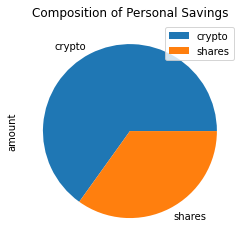

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulation! You have enough money in your fund.")
elif total_savings == emergency_fund:
    print("Congratulation! You have reached your financial goal.")
else:
    print(f"You are ${emergency_fund - total_savings} away from reaching your financial goal.")      

Congratulation! You have enough money in your fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

In [17]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [18]:
# Get 5 years' worth of historical data for AGG and SPY
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 500
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2019-03-26 00:00:00-04:00  108.76  108.93  107.5923  108.840  2253736.0   
2019-03-27 00:00:00-04:00  109.00  109.18  108.8200  109.070  2327158.0   
2019-03-28 00:00:00-04:00  109.06  109.14  108.9600  109.070  1986363.0   
2019-03-29 00:00:00-04:00  108.85  109.07  108.8300  109.065  4801836.0   
2019-04-01 00:00:00-04:00  108.62  108.62  108.2800  108.310  3840042.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2019-03-26 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2019-03-27 00:00:00-04:00  281.11  281.76  277.93  279.72  65592510.0  
2019-03-28 00:00:00-04:00  280.35  281.21  279.07  280.79  50705408.0  
2019-03-29 00:00:00-04:00  282.39  282.84  281.14  282.62  57724114.0  
2019-04-01 00:00:00-04:00  284.70  286.16  284.40  285.89  26929510.0

In [19]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [21]:
# Printing the simulation input data
MC_thirtyyears.portfolio_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2019-03-26 00:00:00-04:00  108.76  108.93  107.5923  108.840  2253736.0   
2019-03-27 00:00:00-04:00  109.00  109.18  108.8200  109.070  2327158.0   
2019-03-28 00:00:00-04:00  109.06  109.14  108.9600  109.070  1986363.0   
2019-03-29 00:00:00-04:00  108.85  109.07  108.8300  109.065  4801836.0   
2019-04-01 00:00:00-04:00  108.62  108.62  108.2800  108.310  3840042.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2019-03-26 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2019-03-27 00:00:00-04:00     0.002113  281.11  281.76  277.93  279.72   
2019-03-28 00:00:00-04:00     0.000000  280.35  281.21  279.07  280.79   
2019-03-29 00:00:00-04:00    -0.000046  282.39  282.84  281.14  282.62   
2019-04-01 00:00:00-04:00    -0.006922  284.70  286.16  284.40  285.89   

                                                    
                               volume daily_return  
time                                                
2019-03-26 00:00:00-04:00         NaN          NaN  
2019-03-27 00:00:00-04:00  65592510.0          NaN  
2019-03-28 00:00:00-04:00  50705408.0     0.003825  
2019-03-29 00:00:00-04:00  57724114.0     0.006517  
2019-04-01 00:00:00-04:00  26929510.0     0.011570

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007624,1.001537,0.992933,1.009419,0.991293,0.989096,0.991572,0.993673,0.989541,1.001960,...,0.996168,1.019977,0.996779,0.985447,0.998895,1.005275,1.002958,0.973869,0.984199,0.983383
2,1.006046,0.990925,0.996990,0.994009,0.989868,1.004380,0.975197,0.987622,0.988616,1.000125,...,0.997630,1.023047,0.988087,0.968831,0.997311,1.000562,1.009694,0.972503,0.984315,0.969520
3,0.995309,1.001546,0.990486,1.007522,1.002410,1.012520,0.974428,0.969002,0.981544,1.004167,...,1.005048,1.010195,0.990122,0.970146,1.003200,0.999735,1.011728,0.980824,0.970539,0.981912
4,0.998850,1.007167,0.986321,1.008599,1.016567,1.002527,0.979057,0.965798,0.977085,1.011893,...,1.002670,1.028654,0.973851,0.967115,0.998692,0.988313,1.027983,0.981716,0.973146,0.991256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,36.044003,84.519121,37.225525,11.487804,104.673884,29.628007,49.685825,16.547852,28.395043,4.245936,...,16.078668,20.543650,39.983961,12.465221,25.814903,31.602353,40.085615,170.276288,11.451220,13.514014
7557,35.750821,83.336640,37.191626,11.595920,104.343595,30.138255,50.648967,16.589284,28.152277,4.229627,...,16.432778,20.685058,39.981117,12.402447,25.729369,31.168364,40.375640,170.007089,11.428692,13.468118
7558,36.210900,84.383399,36.947995,11.622016,103.974862,30.260611,51.058913,16.751323,27.782136,4.284479,...,16.523656,20.865115,40.586662,12.384470,25.766074,31.085620,39.900833,169.001158,11.535877,13.658745
7559,36.394847,85.279777,36.827862,11.782227,103.072186,30.614733,50.927852,17.059866,27.506156,4.273279,...,16.650538,20.656271,40.699569,12.325438,25.734897,31.053562,40.474311,167.454083,11.630053,13.527411


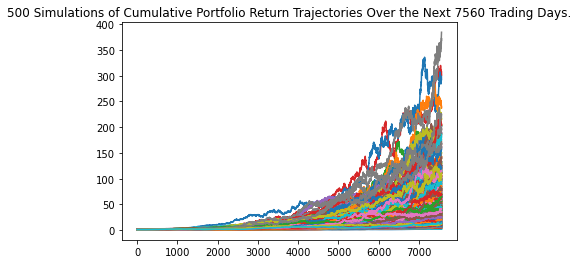

In [23]:
# Plot simulation outcomes
line_plot_thirty = MC_thirtyyears.plot_simulation()

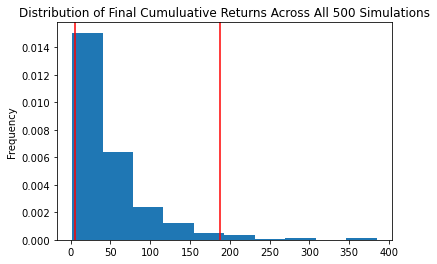

In [24]:
# Plot probability distribution and confidence intervals
dist_plot_thirty = MC_thirtyyears.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_thirty = MC_thirtyyears.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_thirty)

count           500.000000
mean             49.838198
std              49.104280
min               1.994919
25%              19.234094
50%              33.931814
75%              63.277434
max             384.364803
95% CI Lower      6.065723
95% CI Upper    187.969849
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats_thirty[8] * 20000, 2)
ci_upper = round(summary_stats_thirty[9] * 20000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $121314.46 and $3759396.99


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats_thirty[8] * 30000, 2)
ci_upper = round(summary_stats_thirty[9] * 30000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $181971.7 and $5639095.48


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998390,0.993774,0.996753,1.010141,0.984741,1.002751,0.987120,0.972380,1.003289,1.013398,...,0.999179,1.005390,1.010623,0.986081,1.006909,0.996049,1.014383,1.016972,1.006346,1.002196
2,0.993029,1.019421,1.000359,0.998817,0.961585,1.000323,0.968931,0.974566,0.996670,1.024646,...,1.008702,1.007506,1.039900,0.993380,1.000535,0.989654,1.018710,1.027747,1.019734,1.017813
3,0.988666,1.021038,1.005235,0.986245,0.960346,1.006715,0.970179,0.973752,0.991518,1.038154,...,1.010220,0.992248,1.025934,0.983209,0.981526,0.990698,1.024459,1.027127,1.024059,1.019195
4,0.979128,1.028522,1.008781,0.981762,0.974659,1.004274,0.956854,0.951806,0.993163,1.034333,...,0.996508,0.997612,1.027213,0.991421,0.963510,0.991362,1.033883,1.029218,1.037208,1.015776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.616726,2.549745,2.108537,3.438979,3.504686,0.781472,2.173824,2.943660,1.888703,1.196618,...,1.001178,1.565588,1.881827,1.990266,1.106571,1.788347,1.468434,1.926040,2.769913,1.444079
1257,1.627786,2.579865,2.117121,3.443534,3.568307,0.777599,2.147935,2.915708,1.886076,1.190533,...,1.001782,1.564457,1.896526,1.997548,1.115945,1.786937,1.461027,1.919026,2.753152,1.440526
1258,1.627117,2.596828,2.150680,3.448589,3.566892,0.789847,2.174086,2.900783,1.893942,1.184620,...,1.010671,1.566572,1.870835,2.041411,1.117837,1.812865,1.476203,1.935882,2.759028,1.444136
1259,1.611598,2.581529,2.163265,3.480503,3.563908,0.790338,2.171834,2.844319,1.898773,1.182991,...,1.011302,1.516339,1.863448,2.035022,1.118277,1.812836,1.478019,1.926324,2.704818,1.457787


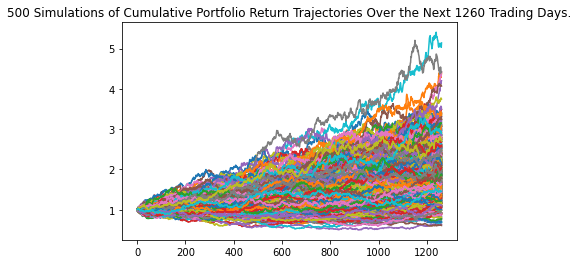

In [30]:
# Plot simulation outcomes
line_plot_five = MC_fiveyears.plot_simulation()

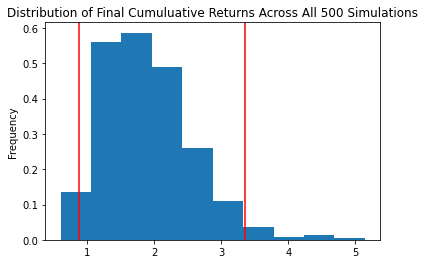

In [31]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyears.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_five = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_five)

count           500.000000
mean              1.902681
std               0.668920
min               0.608106
25%               1.432389
50%               1.820611
75%               2.265883
max               5.140599
95% CI Lower      0.883562
95% CI Upper      3.351290
Name: 1260, dtype: float64


In [33]:
# Set initial investment
initial_investment = 20000 * 3
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stats_five[8] * 60000, 2)
ci_upper_five = round(summary_stats_five[9] * 60000, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53013.73 and $201077.39


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987330,0.984889,1.007097,0.997037,0.995415,0.989879,1.013909,1.014261,0.993756,1.003326,...,0.999321,0.996437,1.010422,1.004926,1.001331,0.997836,1.008984,1.003571,0.991001,1.003077
2,0.996982,1.001593,0.996111,0.996418,0.977824,1.000665,1.023489,1.013716,1.004923,1.019232,...,0.993347,1.021925,1.030756,1.006696,0.990031,0.983177,1.009596,1.007787,0.986764,0.995045
3,0.998042,1.020125,0.993470,0.987862,0.980009,1.006688,1.022336,1.021930,1.017199,1.007027,...,0.999151,1.030196,1.029177,1.020567,0.992714,0.980022,1.031313,1.017068,0.994392,0.989548
4,0.991151,1.025392,0.975505,0.990363,0.981330,1.010052,1.023554,1.035828,1.012535,0.993986,...,0.991059,1.042111,1.023692,1.032876,0.993911,0.990361,1.013726,1.008189,0.986804,0.982277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.517796,2.266237,2.587358,4.984127,1.228086,2.177261,7.425494,4.670997,2.698915,3.596784,...,2.348144,2.713564,2.186355,2.580976,5.894476,2.551580,3.691297,8.469903,3.618173,1.246830
2517,5.502817,2.277844,2.592322,4.970669,1.236801,2.181339,7.402815,4.603656,2.712674,3.568180,...,2.382531,2.673652,2.163704,2.528194,5.880089,2.525880,3.674352,8.445102,3.644076,1.261004
2518,5.480822,2.279848,2.605249,4.953395,1.235557,2.187070,7.289327,4.574203,2.664607,3.605708,...,2.364917,2.726211,2.115423,2.571243,5.842374,2.529845,3.629057,8.440244,3.616944,1.259371
2519,5.473241,2.281397,2.602440,4.910443,1.231445,2.193658,7.221667,4.586389,2.636699,3.622382,...,2.345278,2.736758,2.096758,2.554289,5.867307,2.545053,3.568053,8.327610,3.588194,1.279120


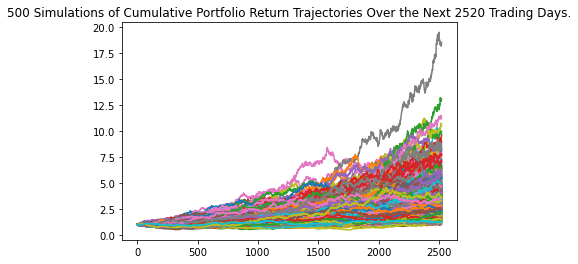

In [36]:
# Plot simulation outcomes
line_plot_ten = MC_tenyears.plot_simulation()

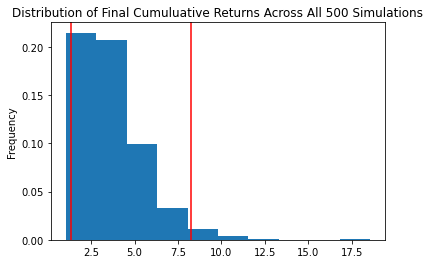

In [37]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyears.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_ten = MC_tenyears.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_ten)

count           500.000000
mean              3.729730
std               1.908259
min               1.037956
25%               2.362211
50%               3.360550
75%               4.631645
max              18.559681
95% CI Lower      1.351878
95% CI Upper      8.248791
Name: 2520, dtype: float64


In [39]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats_ten[8] * 60000, 2)
ci_upper_ten = round(summary_stats_ten[9] * 60000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $81112.7 and $494927.48
